In [1]:
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import glob
import pandas as pd
from IPython.display import YouTubeVideo

In [2]:
vocabulary_data = pd.read_csv('./vocabulary.csv')

In [3]:
vocabulary_data.head(25)

,Index,TrainVideoCount,KnowledgeGraphId,Name
0,0,788288,/m/03bt1gh,Game
1,1,539945,/m/01mw1,Video game
2,2,415890,/m/07yv9,Vehicle
3,3,378135,/m/01jddz,Concert
4,4,286532,/m/09jwl,Musician
5,5,236948,/m/0215n,Cartoon
6,6,203343,/m/01350r,Performance art
7,7,200813,/m/0k4j,Car
8,8,181579,/m/026bk,Dance
9,9,156226,/m/0342h,Guitar


In [4]:
vocabulary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3862 entries, 0 to 3861
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Index             3862 non-null   int64 
 1   TrainVideoCount   3862 non-null   int64 
 2   KnowledgeGraphId  3862 non-null   object
 3   Name              3806 non-null   object
dtypes: int64(2), object(2)
memory usage: 120.8+ KB


In [5]:
vocabulary_data.describe()

,Index,TrainVideoCount
count,3862.000000,3862.000000
mean,1930.500000,3032.527188
std,1115.007698,21182.048375
min,0.000000,123.000000
25%,965.250000,234.000000
50%,1930.500000,440.500000
75%,2895.750000,1199.750000
max,3861.000000,788288.000000


In [6]:
record = "/home/hexa/Jupyter/may2022/2/video/train/train3815.tfrecord"

In [7]:
vid_ids = []
labels = []
rgb = []
audio = []

In [8]:
for example in tf.compat.v1.python_io.tf_record_iterator(record):
    seq_example = tf.train.Example.FromString(example)
    # filter videos containing "Cooking" label
    if 22 in seq_example.features.feature['labels'].int64_list.value:
        vid_ids.append(seq_example.features.feature['id'].bytes_list.value[0].decode(encoding='UTF-8'))
        labels.append(seq_example.features.feature['labels'].int64_list.value)
        rgb.append(seq_example.features.feature['mean_rgb'].float_list.value)
        audio.append(seq_example.features.feature['mean_audio'].float_list.value)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [9]:
print('Number of videos in this tfrecord: ',len(vid_ids))
print ('Number of labels in this tfrecord: ', len (labels))

Number of videos in this tfrecord:  21
Number of labels in this tfrecord:  21


In [10]:
vid_ids

['ZU9H',
 'Xz9H',
 'yU9H',
 '499H',
 '9u9H',
 'GC9H',
 'ij9H',
 'MJ9H',
 '7b9H',
 'Kp9H',
 'uc9H',
 'x29H',
 'hp9H',
 'ho9H',
 'Vh9H',
 'SI9H',
 'Wr9H',
 'IB9H',
 'ea9H',
 'jI9H',
 '6f9H']

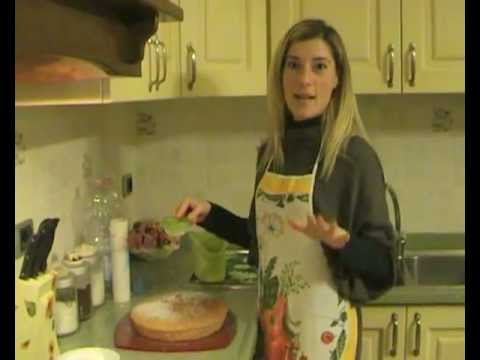

In [11]:
# SI9H -> tknvPTMGJEg
YouTubeVideo('tknvPTMGJEg')

In [12]:
from pytube import YouTube

yt = YouTube("https://www.youtube.com/watch?v=tknvPTMGJEg")
yt.streams.filter(file_extension="mp4").get_by_resolution("360p").download("./downloaded-video.mp4")

'/home/hexa/Jupyter/Youtube-Video-Label-Classification/./downloaded-video.mp4/torta Margherita PIUMA ricetta passo passo tutorial base per decorazioni.mp4'

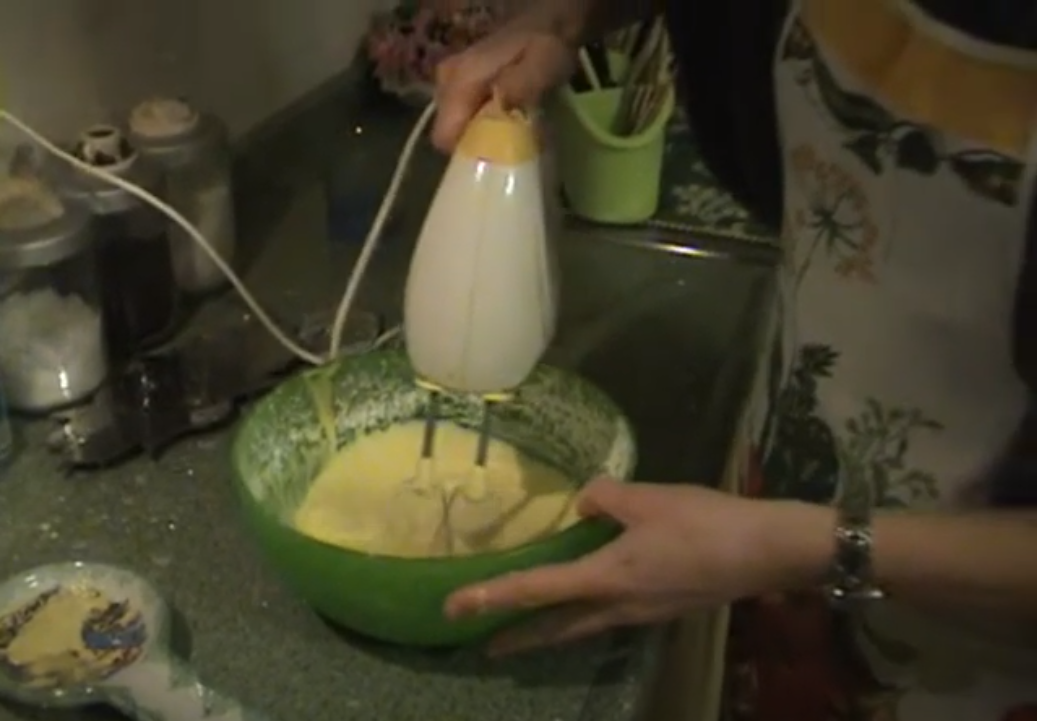

In [13]:
from IPython.display import Image
pil_img = Image(filename='./frame-2-35.png')
display(pil_img)

In [15]:
import pixellib
from pixellib.instance import instance_segmentation

segment_image = instance_segmentation(infer_speed = "rapid")
segment_image.load_model("./mask_rcnn_coco.h5")

In [16]:
segmask = segment_image.segmentImage("./frame-2-35.png", show_bboxes=True, output_image_name="./frame-2-35-converted.png")

Processed image saved successfully in your current working directory.


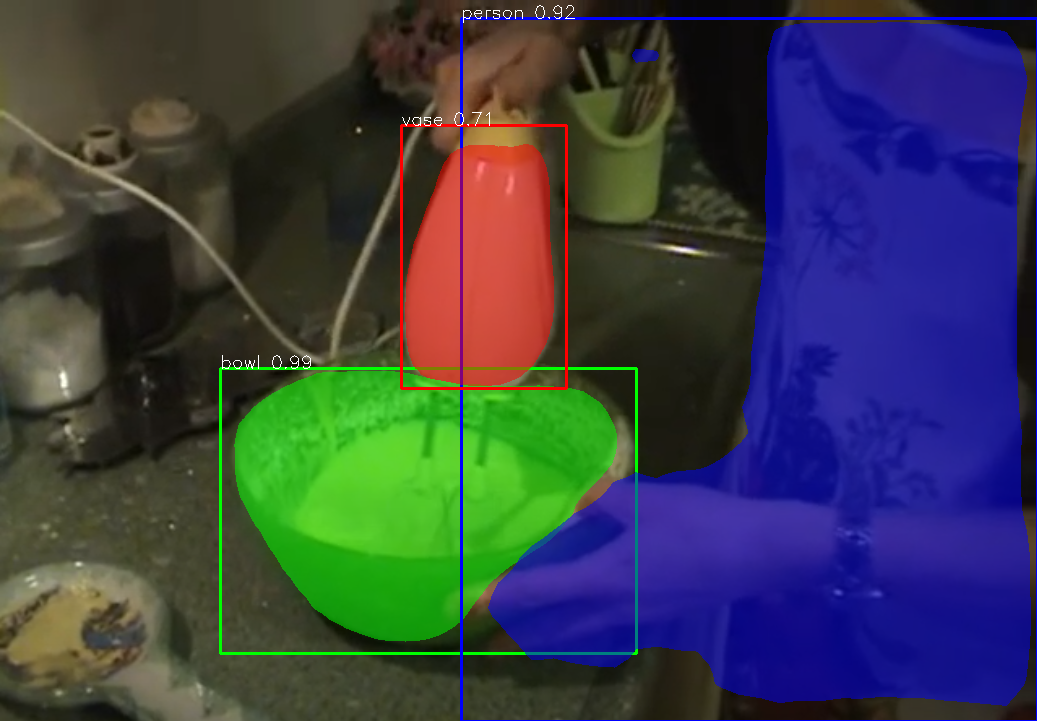

In [17]:
pil_img1 = Image(filename='./frame-2-35-converted.png')
display(pil_img1)

In [18]:
segment_video = instance_segmentation(infer_speed = "rapid")
segment_video.load_model("./mask_rcnn_coco.h5")

In [19]:
segment_video.process_video("./sample-1.mp4", frames_per_second = 30, output_video_name = "output.mp4")

OpenCV: FFMPEG: tag 0x58564944/'DIVX' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


No. of frames: 1
No. of frames: 2
No. of frames: 3
No. of frames: 4
No. of frames: 5
No. of frames: 6
No. of frames: 7
No. of frames: 8
No. of frames: 9
No. of frames: 10
No. of frames: 11
No. of frames: 12
No. of frames: 13
No. of frames: 14
No. of frames: 15
No. of frames: 16
No. of frames: 17
No. of frames: 18
No. of frames: 19
No. of frames: 20
No. of frames: 21
No. of frames: 22
No. of frames: 23
No. of frames: 24
No. of frames: 25
No. of frames: 26
No. of frames: 27
No. of frames: 28
No. of frames: 29
No. of frames: 30
No. of frames: 31
No. of frames: 32
No. of frames: 33
No. of frames: 34
No. of frames: 35
No. of frames: 36
No. of frames: 37
No. of frames: 38
No. of frames: 39
No. of frames: 40
No. of frames: 41
No. of frames: 42
No. of frames: 43
No. of frames: 44
No. of frames: 45
No. of frames: 46
No. of frames: 47
No. of frames: 48
No. of frames: 49
No. of frames: 50
No. of frames: 51
No. of frames: 52
No. of frames: 53
No. of frames: 54
No. of frames: 55
No. of frames: 56
N

No. of frames: 438
No. of frames: 439
No. of frames: 440
No. of frames: 441
No. of frames: 442
No. of frames: 443
No. of frames: 444
No. of frames: 445
No. of frames: 446
No. of frames: 447
No. of frames: 448
No. of frames: 449
No. of frames: 450
No. of frames: 451
No. of frames: 452
No. of frames: 453
No. of frames: 454
No. of frames: 455
No. of frames: 456
No. of frames: 457
No. of frames: 458
No. of frames: 459
No. of frames: 460
No. of frames: 461
No. of frames: 462
No. of frames: 463
No. of frames: 464
No. of frames: 465
No. of frames: 466
No. of frames: 467
No. of frames: 468
No. of frames: 469
No. of frames: 470
No. of frames: 471
No. of frames: 472
No. of frames: 473
No. of frames: 474
No. of frames: 475
No. of frames: 476
No. of frames: 477
No. of frames: 478
No. of frames: 479
No. of frames: 480
No. of frames: 481
No. of frames: 482
No. of frames: 483
No. of frames: 484
No. of frames: 485
No. of frames: 486
No. of frames: 487
No. of frames: 488
No. of frames: 489
No. of frame

No. of frames: 870
No. of frames: 871
No. of frames: 872
No. of frames: 873
No. of frames: 874
No. of frames: 875
No. of frames: 876
No. of frames: 877
No. of frames: 878
No. of frames: 879
No. of frames: 880
No. of frames: 881
No. of frames: 882
No. of frames: 883
No. of frames: 884
No. of frames: 885
No. of frames: 886
No. of frames: 887
No. of frames: 888
No. of frames: 889
No. of frames: 890
No. of frames: 891
No. of frames: 892
No. of frames: 893
No. of frames: 894
No. of frames: 895
No. of frames: 896
No. of frames: 897
No. of frames: 898
No. of frames: 899
No. of frames: 900
No. of frames: 901
No. of frames: 902
No. of frames: 903
No. of frames: 904
No. of frames: 905
No. of frames: 906
No. of frames: 907
No. of frames: 908
No. of frames: 909
No. of frames: 910
No. of frames: 911
No. of frames: 912
No. of frames: 913
No. of frames: 914
No. of frames: 915
No. of frames: 916
No. of frames: 917
No. of frames: 918
No. of frames: 919
No. of frames: 920
No. of frames: 921
No. of frame

No. of frames: 1287
No. of frames: 1288
No. of frames: 1289
No. of frames: 1290
No. of frames: 1291
No. of frames: 1292
No. of frames: 1293
No. of frames: 1294
No. of frames: 1295
No. of frames: 1296
No. of frames: 1297
No. of frames: 1298
No. of frames: 1299
No. of frames: 1300
No. of frames: 1301
No. of frames: 1302
No. of frames: 1303
No. of frames: 1304
No. of frames: 1305
No. of frames: 1306
No. of frames: 1307
No. of frames: 1308
No. of frames: 1309
No. of frames: 1310
No. of frames: 1311
No. of frames: 1312
No. of frames: 1313
No. of frames: 1314
No. of frames: 1315
No. of frames: 1316
No. of frames: 1317
No. of frames: 1318
No. of frames: 1319
No. of frames: 1320
No. of frames: 1321
No. of frames: 1322
No. of frames: 1323
No. of frames: 1324
No. of frames: 1325
No. of frames: 1326
No. of frames: 1327
No. of frames: 1328
No. of frames: 1329
No. of frames: 1330
No. of frames: 1331
No. of frames: 1332
No. of frames: 1333
No. of frames: 1334
No. of frames: 1335
No. of frames: 1336


No. of frames: 1697
No. of frames: 1698
No. of frames: 1699
No. of frames: 1700
No. of frames: 1701
No. of frames: 1702
No. of frames: 1703
No. of frames: 1704
No. of frames: 1705
No. of frames: 1706
No. of frames: 1707
No. of frames: 1708
No. of frames: 1709
No. of frames: 1710
No. of frames: 1711
No. of frames: 1712
No. of frames: 1713
No. of frames: 1714
No. of frames: 1715
No. of frames: 1716
No. of frames: 1717
No. of frames: 1718
No. of frames: 1719
No. of frames: 1720
No. of frames: 1721
No. of frames: 1722
No. of frames: 1723
No. of frames: 1724
No. of frames: 1725
No. of frames: 1726
No. of frames: 1727
No. of frames: 1728
No. of frames: 1729
No. of frames: 1730
No. of frames: 1731
No. of frames: 1732
No. of frames: 1733
No. of frames: 1734
No. of frames: 1735
No. of frames: 1736
No. of frames: 1737
No. of frames: 1738
No. of frames: 1739
No. of frames: 1740
No. of frames: 1741
No. of frames: 1742
No. of frames: 1743
No. of frames: 1744
No. of frames: 1745
No. of frames: 1746


({'rois': array([], shape=(0, 4), dtype=int32),
  'class_ids': array([], dtype=int32),
  'scores': array([], dtype=float32),
  'masks': array([], shape=(720, 1280, 0), dtype=float64)},
 array([[[31, 34, 47],
         [31, 34, 47],
         [31, 34, 47],
         ...,
         [12, 12, 12],
         [12, 12, 12],
         [12, 12, 12]],
 
        [[31, 34, 47],
         [31, 34, 47],
         [31, 34, 47],
         ...,
         [12, 12, 12],
         [12, 12, 12],
         [12, 12, 12]],
 
        [[31, 34, 47],
         [31, 34, 47],
         [31, 34, 47],
         ...,
         [12, 12, 12],
         [12, 12, 12],
         [12, 12, 12]],
 
        ...,
 
        [[34, 30, 40],
         [34, 30, 40],
         [36, 32, 42],
         ...,
         [27, 28, 33],
         [24, 25, 30],
         [24, 25, 30]],
 
        [[34, 30, 40],
         [34, 30, 40],
         [36, 32, 42],
         ...,
         [27, 28, 33],
         [24, 25, 30],
         [24, 25, 30]],
 
        [[34, 30, 40],
  